In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Linear regression using the Normal Equation

In [2]:
import numpy as np

# y = 4 + 3x + noise
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


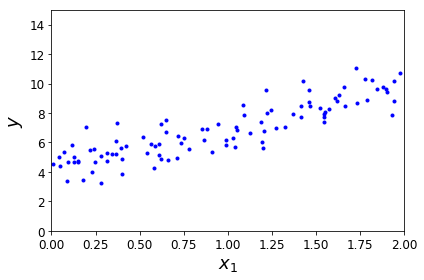

In [10]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) #rotation parameter is for text alignment
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [14]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance. x0 is always 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #use the closed form equation for theta best 

In [15]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new = np.array([[0],[2]]) #test data
X_b_new = np.c_[np.ones((2,1)),X_new] 

In [18]:
y_predict = X_b_new.dot(theta_best) #prediction based on test data

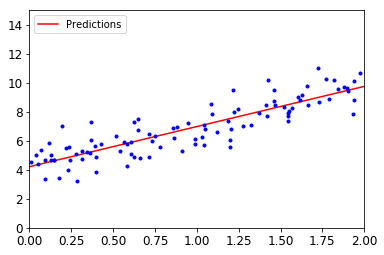

In [46]:
plt.plot(X_new,y_predict, "r-")
plt.plot(X,y,"b.")
plt.legend(["Predictions"], loc="upper left", fontsize=10)
plt.axis([0,2,0,15])
plt.show()

In [65]:
eta = 0.1 # learning rate
n_iterations = 1000 # number of iterations (epochs)
m = 100 # number of instances (X)
theta = np.random.rand(2,1)

In [66]:
for iter in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradient

In [67]:
theta

array([[4.21509616],
       [2.77011339]])

In [74]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

In [79]:
from sklearn.linear_model import LinearRegression
theta_best, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best

array([[4.21509616],
       [2.77011339]])

In [83]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,y)
y_predict = LR.predict(X_new)
LR.intercept_, LR.coef_

(array([4.21509616]), array([[2.77011339]]))